In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("academic_performance.csv")
print("Initial Dataset:")
df.head()

Initial Dataset:


,Unnamed: 0,rollno,name,marks,grade
0,0,1,a,40.0,F
1,1,2,b,23.0,F
2,2,3,c,50.0,P
3,3,4,d,78.0,P
4,4,5,e,48.0,P


In [ ]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Unnamed: 0    0
rollno        0
name          2
marks         2
grade         2
dtype: int64


In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

<ipython-input-25-0c8fdc0ed345>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-25-0c8fdc0ed345>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [ ]:
print("\nMissing values after filling:")
print(df.isnull().sum())


Missing values after filling:
Unnamed: 0    0
rollno        0
name          0
marks         0
grade         0
dtype: int64


In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
z_scores = np.abs(stats.zscore(df[numeric_cols]))
outliers = (z_scores > 3)

In [ ]:
print("Outliers per column (Z-score > 3):")
print(pd.DataFrame(outliers, columns=numeric_cols).sum())

Outliers per column (Z-score > 3):
Unnamed: 0    0
rollno        0
marks         0
dtype: int64


In [ ]:
def cap_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper,
                       np.where(df[col] < lower, lower, df[col]))

for col in numeric_cols:
    cap_outliers(col)

z_scores = np.abs(stats.zscore(df[numeric_cols]))
print("\nOutliers after capping:")
print(pd.DataFrame((z_scores > 3), columns=numeric_cols).sum())


Outliers after capping:
Unnamed: 0    0
rollno        0
marks         0
dtype: int64


In [ ]:
column_to_transform = numeric_cols[0]
scaler = StandardScaler()
df[column_to_transform + '_scaled'] = scaler.fit_transform(df[[column_to_transform]])

df[[column_to_transform, column_to_transform + '_scaled']].head()

,Unnamed: 0,Unnamed: 0_scaled
0,0.0,-1.620185
1,1.0,-1.388730
2,2.0,-1.157275
3,3.0,-0.925820
4,4.0,-0.694365


In [ ]:
df[[column_to_transform, column_to_transform + '_scaled']].head()

,Unnamed: 0,Unnamed: 0_scaled
0,0.0,-1.620185
1,1.0,-1.388730
2,2.0,-1.157275
3,3.0,-0.925820
4,4.0,-0.694365


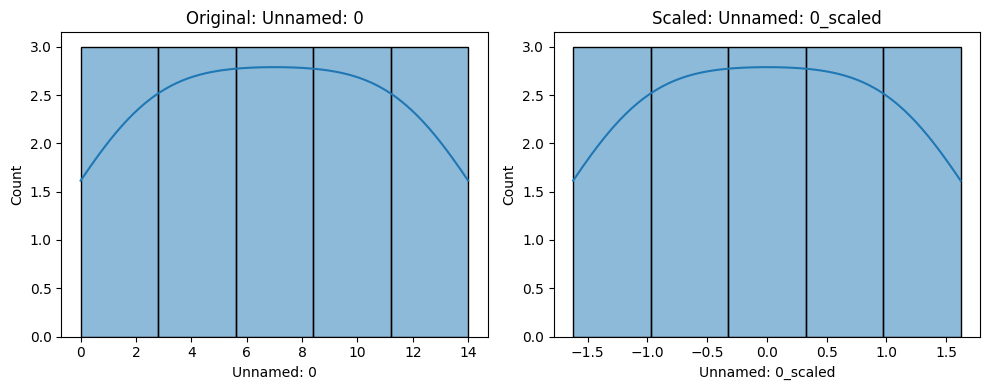

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df[column_to_transform], kde=True)
plt.title(f"Original: {column_to_transform}")

plt.subplot(1,2,2)
sns.histplot(df[column_to_transform + '_scaled'], kde=True)
plt.title(f"Scaled: {column_to_transform + '_scaled'}")
plt.tight_layout()
plt.show()